# Blood Sample

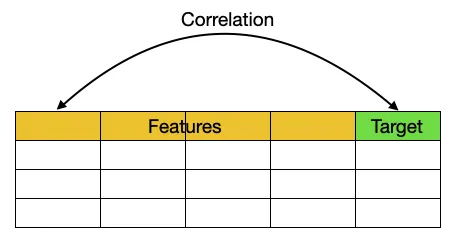

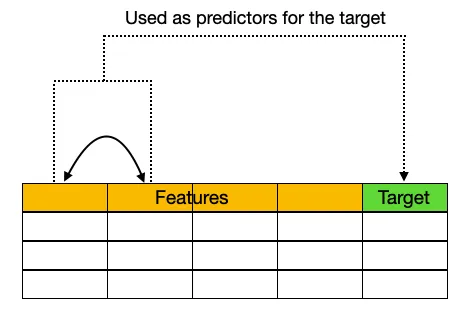

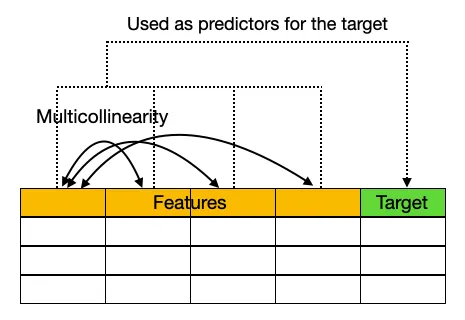

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import lasso_path
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df2 = pd.read_excel(r"C:\Users\marve\Downloads\bloodpressure.xlsx")

# Split the combined column using str.split
df2[['Pt', 'BP', 'Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress','']] = df2['Pt,BP,Age,Weight,BSA,Dur,Pulse,Stress,'].str.split(',', expand=True)

# Drop the original combined column
df2.drop(columns=['Pt,BP,Age,Weight,BSA,Dur,Pulse,Stress,'], inplace=True)

# Display the resulting DataFrame
df2.head()

,Pt,BP,Age,Weight,BSA,Dur,Pulse,Stress,
0,1,105,47,85.4,1.75,5.1,63,33,
1,2,115,49,94.2,2.1,3.8,70,14,
2,3,116,49,95.3,1.98,8.2,72,10,
3,4,117,50,94.7,2.01,5.8,73,99,
4,5,112,51,89.4,1.89,7,72,95,


In [3]:
print(df2.columns.tolist())

['Pt', 'BP', 'Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress', '']


In [4]:
df2.drop(columns=['Pt', ''], inplace=True)

column_names = df2.columns
print(column_names)

Index(['BP', 'Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress'], dtype='object')


In [5]:
df2

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.1,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7,72,95
5,121,48,99.5,2.25,9.3,71,10
6,121,49,99.8,2.25,2.5,69,42
7,110,47,90.9,1.9,6.2,66,8
8,110,49,89.2,1.83,7.1,69,62
9,114,48,92.7,2.07,5.6,64,35


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BP      20 non-null     object
 1   Age     20 non-null     object
 2   Weight  20 non-null     object
 3   BSA     20 non-null     object
 4   Dur     20 non-null     object
 5   Pulse   20 non-null     object
 6   Stress  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [6]:
# Part of mini-project 2

In [21]:
# Perform an EDA

In [22]:
columns_to_convert = ['BP', 'Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress']

# Convert specified columns to numeric
df2[columns_to_convert] = df2[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BP      20 non-null     int64  
 1   Age     20 non-null     int64  
 2   Weight  20 non-null     float64
 3   BSA     20 non-null     float64
 4   Dur     20 non-null     float64
 5   Pulse   20 non-null     int64  
 6   Stress  20 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 1.2 KB


In [24]:
df2.head()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95


In [25]:
df2.shape

(20, 7)

In [26]:
df2.describe()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,114.000000,48.600000,93.090000,1.998000,6.430000,69.600000,53.35000
std,5.428967,2.500526,4.294905,0.136482,2.145276,3.803046,37.08635
min,105.000000,45.000000,85.400000,1.750000,2.500000,62.000000,8.00000
25%,110.000000,47.000000,90.225000,1.897500,5.250000,67.750000,17.00000
50%,114.000000,48.500000,94.150000,1.980000,6.000000,70.000000,44.50000
75%,116.250000,49.250000,94.850000,2.075000,7.600000,72.000000,95.00000
max,125.000000,56.000000,101.300000,2.250000,10.200000,76.000000,99.00000


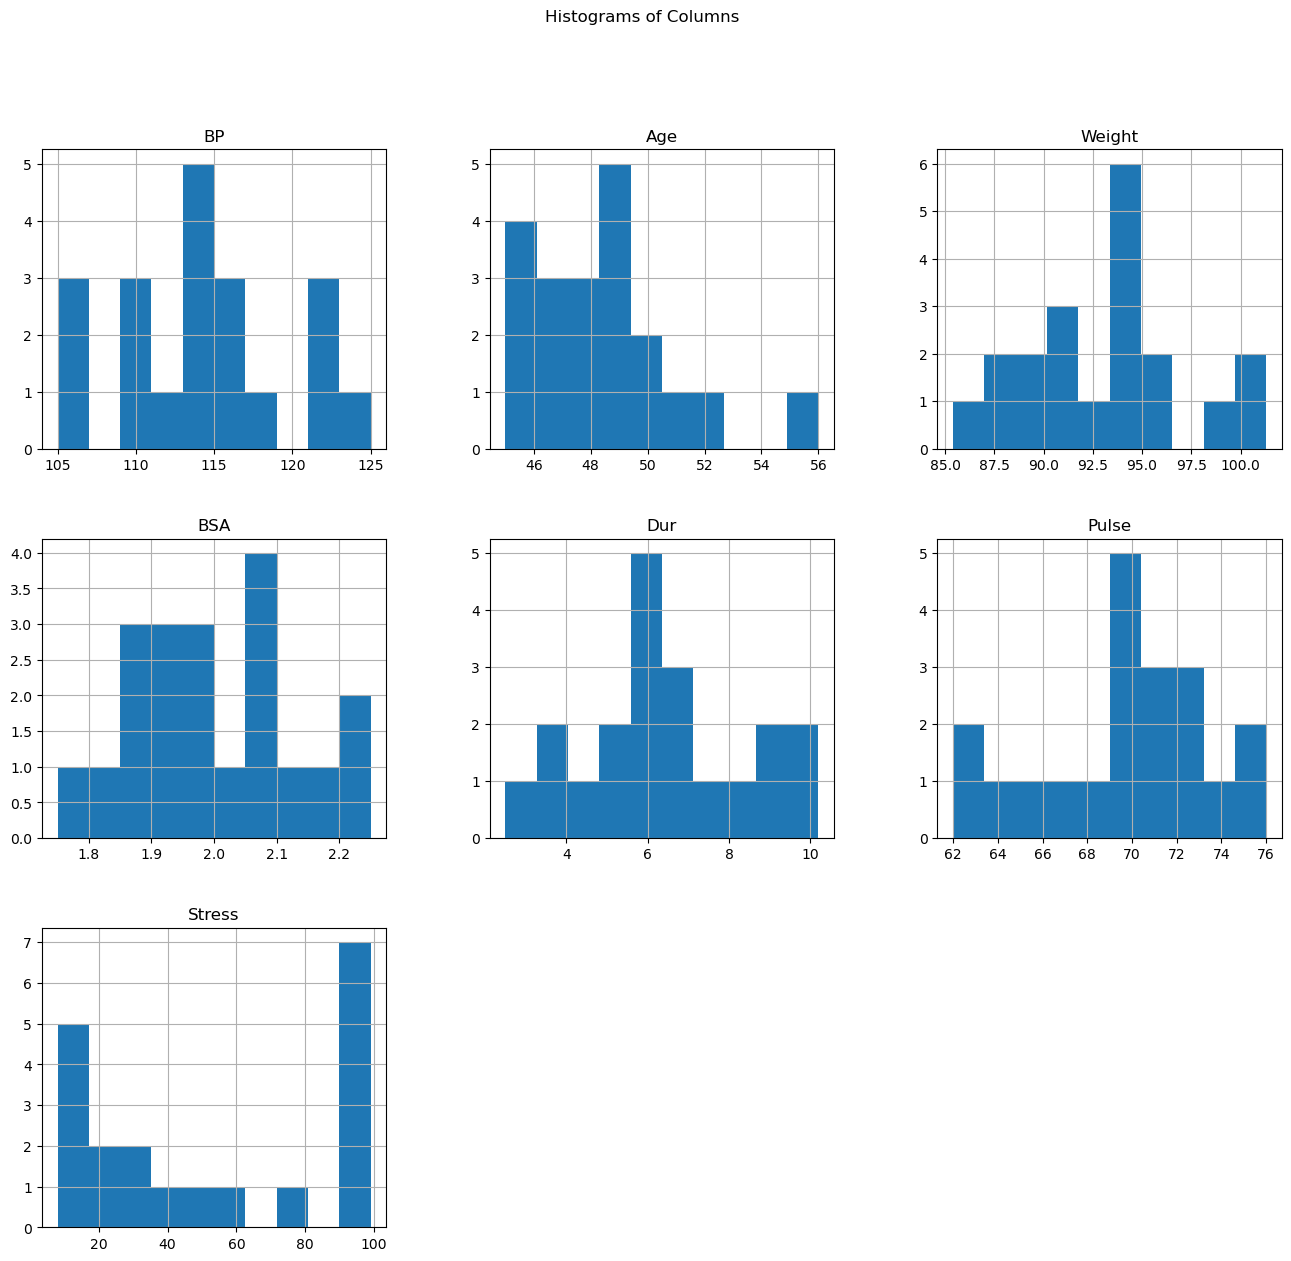

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df2.hist(figsize=(16, 14))
plt.suptitle('Histograms of Columns')
plt.show()

The sample featured 20 subjects aged 46-56 with high blood pressure (hypertension) scores ranging from 105 mm Hg to 125 mm HG and basal pulse scores ranging from 62-78 beats per minute.

Duration of hypertension ranged from 1-10 years with more than 2/3 of subjects having theirs last mare than 5 years.
 
Subjects weight ranged from 85.4-101.3 kg with an average 0f 94.5 kg and a body surface area (BSA) ranging from 1.75 sq m 2.25 sq m.

Seven participants scored very high for stress with index ratings ranging from 90-99.

C:\Users\marve\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


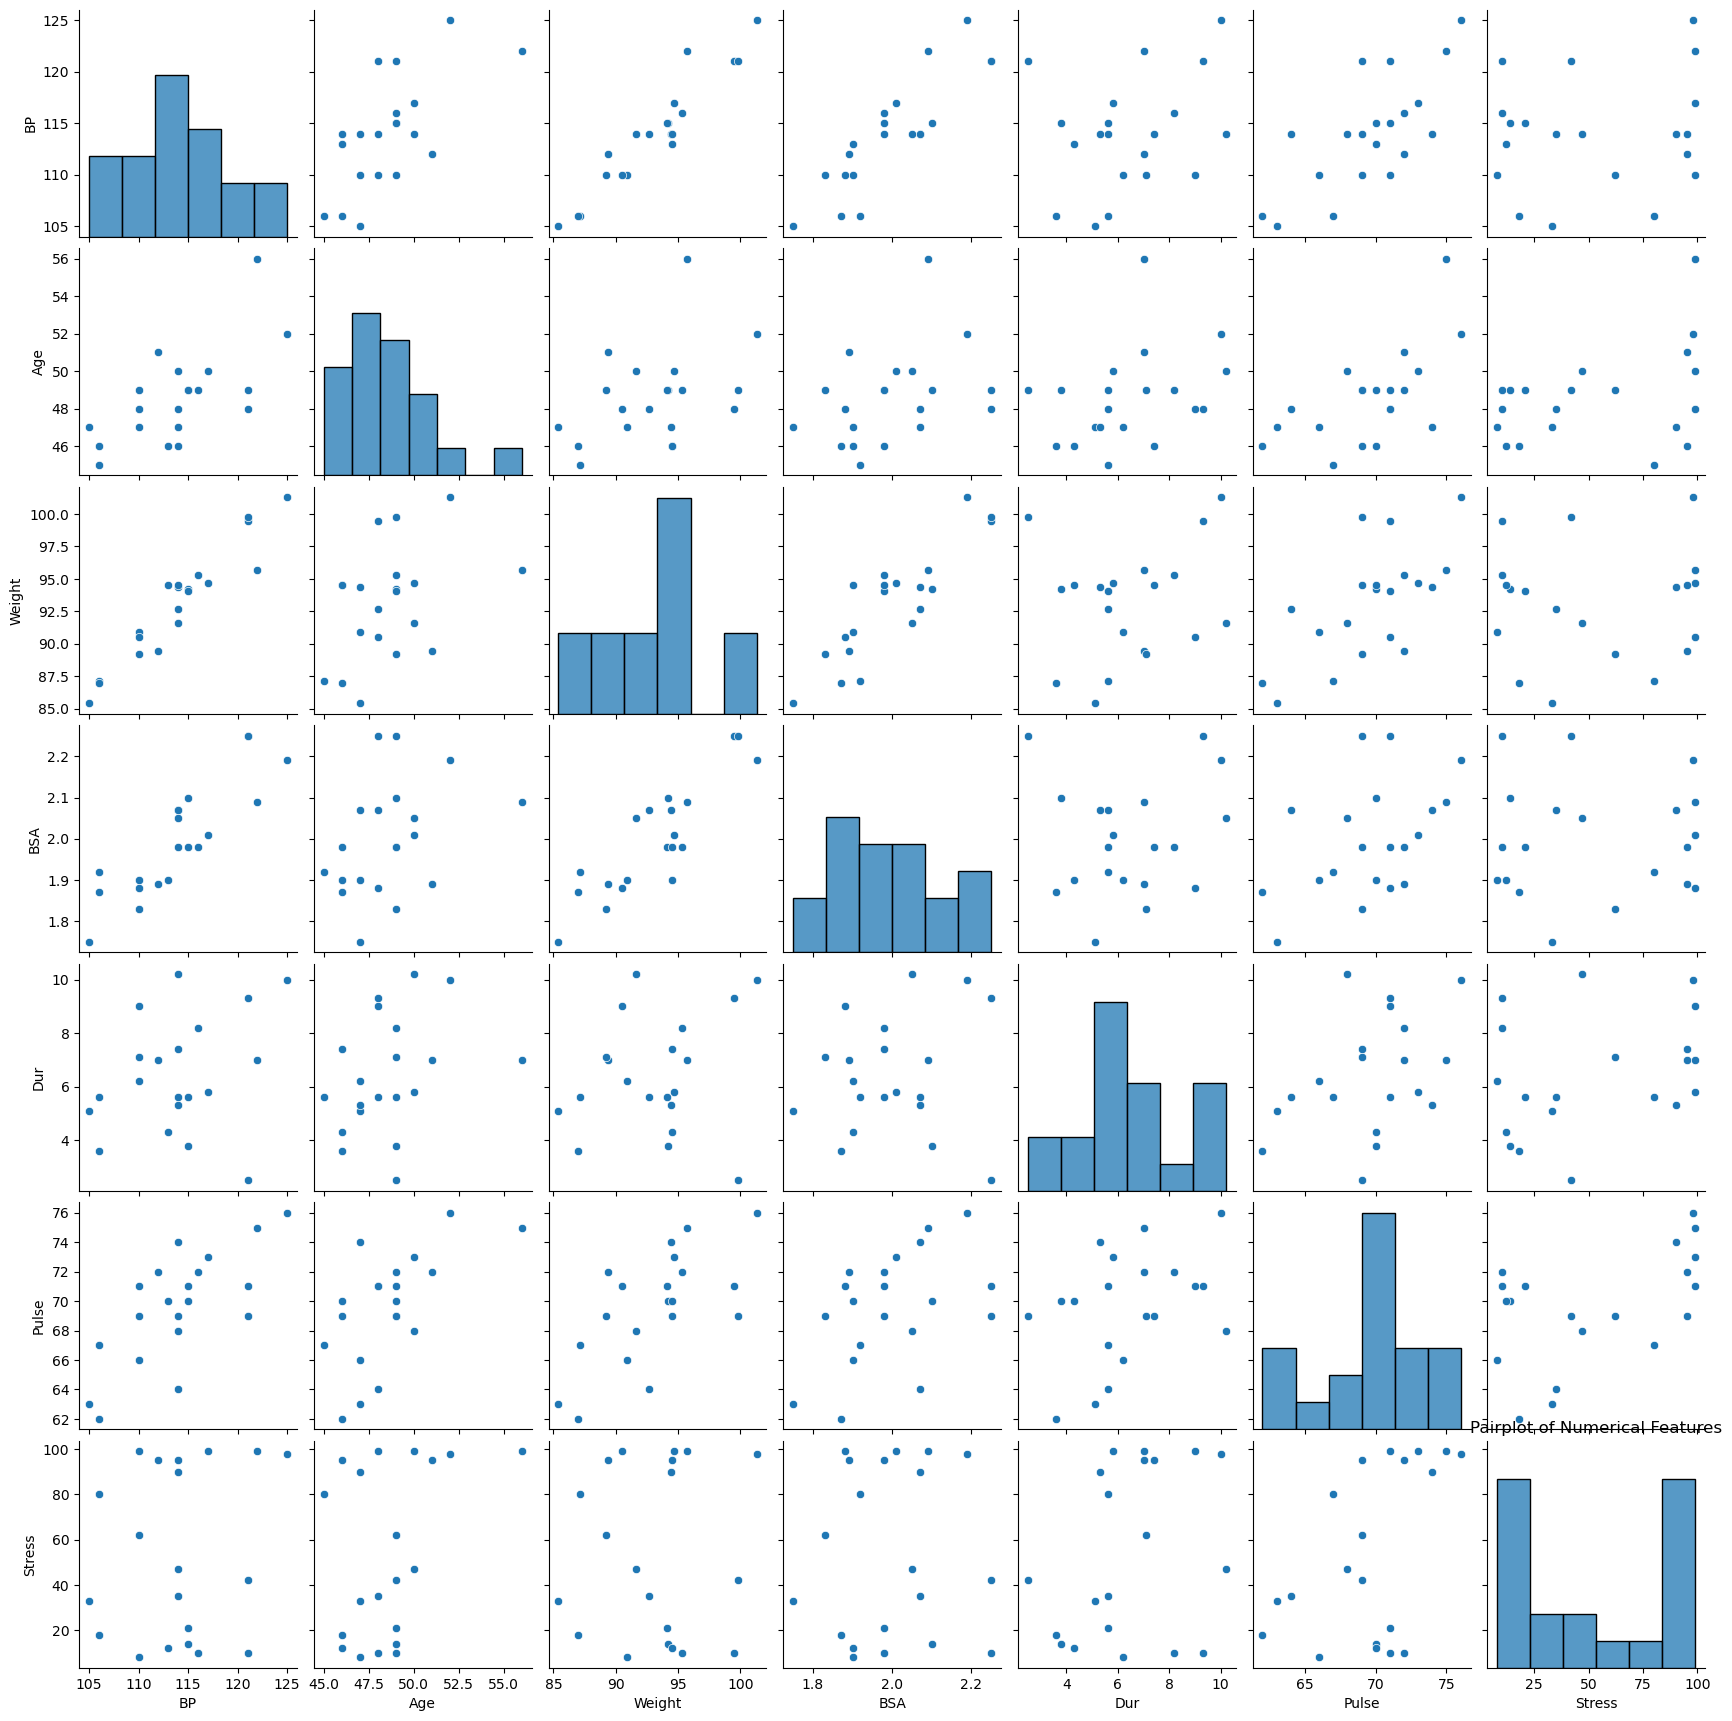

In [28]:
numerical_columns = df2.select_dtypes(include=['int','float'])

sns.pairplot(numerical_columns)
plt.title('Pairplot of Numerical Features')
plt.show()

Positive correlations can be observed between 'BP' and several of the other variables on the first column/row of the pairplot.

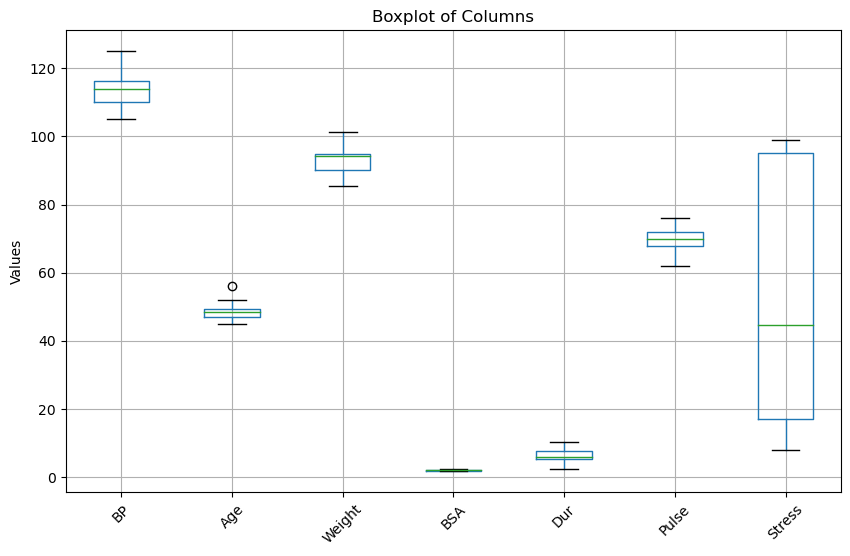

In [29]:
plt.figure(figsize=(10, 6))

columns = df2.loc[:, df2.nunique() > 2]

# Create boxplots for non-binary columns
columns.boxplot()

# Set title and labels
plt.title('Boxplot of Columns')
plt.ylabel('Values')

plt.xticks(rotation=45)
plt.show()

The 'Stress' variable produced the largest boxplot with 50% of the data (interquartile range) ranging from the 25th percentile (17) and the 75th percentile (95) with a median of 44.5.
The remaining six variables produced considerably smaller scales, the largest of which was 'BP' with an interquatile range of 110-116.25 with a median of 114.

In [30]:
missing_values = df2.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
BP        0
Age       0
Weight    0
BSA       0
Dur       0
Pulse     0
Stress    0
dtype: int64


In [31]:
correlation_matrix = df2.corr()

# Print the correlation matrix
print(correlation_matrix)

              BP       Age    Weight       BSA       Dur     Pulse    Stress
BP      1.000000  0.659093  0.950068  0.865879  0.292834  0.721413  0.163901
Age     0.659093  1.000000  0.407349  0.378455  0.343792  0.618764  0.368224
Weight  0.950068  0.407349  1.000000  0.875305  0.200650  0.659340  0.034355
BSA     0.865879  0.378455  0.875305  1.000000  0.130540  0.464819  0.018446
Dur     0.292834  0.343792  0.200650  0.130540  1.000000  0.401514  0.311640
Pulse   0.721413  0.618764  0.659340  0.464819  0.401514  1.000000  0.506310
Stress  0.163901  0.368224  0.034355  0.018446  0.311640  0.506310  1.000000


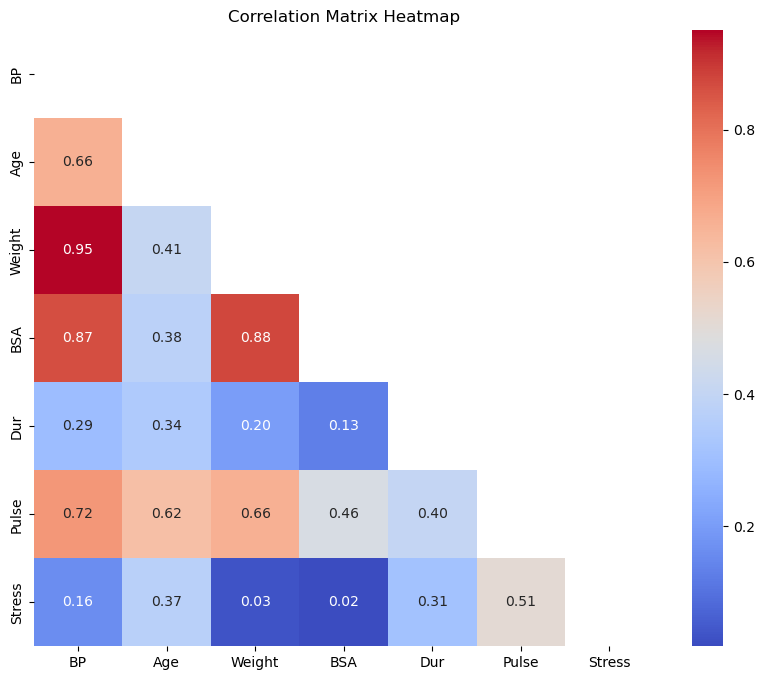

In [32]:

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Matrix Heatmap')
plt.show()

Both the pairplot and correlation matrix both showed significant positive correlations between the target variable ('BP') and predictor variables; 'Age' (r=0.66), 'Pulse' (r=0.72), 'BSA' (r=0.87), and 'Weight' (r=0.95).

Strong correlations were also found between predictor variables such as 'Pulse' and 'Age' (r=0.62), 'Pulse' and 'Weight' (r=0.66), and 'BSA' and 'Weight' (r=0.88).

Collinearity could be affecting target variable as a result of the significant correlations among the aforementioned predictor variables.

In [33]:
BP_correlations = correlation_matrix['BP'].abs().sort_values(ascending=False)

best_predictor = BP_correlations.index[1]  

print("Best predictor for BP:", best_predictor)
print("Correlation coefficient:", BP_correlations.iloc[1])

Best predictor for BP: Weight
Correlation coefficient: 0.9500676517041239


In [34]:
import patsy

non_target_cols = [c for c in df2.columns if c != 'BP']

# Use some string adding and joining to make the simple model formula:
formula_simple = 'BP' + ' ~ ' + ' + '.join(non_target_cols)+ ' -1'
print(f"Formula_simple: {formula_simple} \n")

# Make the complex formula:
formula_complex = 'BP' + ' ~ (' + ' + '.join(non_target_cols) + ')**2 -1'
print(f"Formula_complex: {formula_complex} \n")

Formula_simple: BP ~ Age + Weight + BSA + Dur + Pulse + Stress -1 

Formula_complex: BP ~ (Age + Weight + BSA + Dur + Pulse + Stress)**2 -1 



In [38]:
Y, X = patsy.dmatrices(formula_simple, data=df2, return_type='dataframe')
Yoverfit, Xoverfit = patsy.dmatrices(formula_complex, data=df2, return_type='dataframe')

Y = Y.values.ravel()
Yoverfit = Yoverfit.values.ravel()

In [39]:
X.columns

Index(['Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress'], dtype='object')

In [40]:
Xoverfit.columns

Index(['Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress', 'Age:Weight',
       'Age:BSA', 'Age:Dur', 'Age:Pulse', 'Age:Stress', 'Weight:BSA',
       'Weight:Dur', 'Weight:Pulse', 'Weight:Stress', 'BSA:Dur', 'BSA:Pulse',
       'BSA:Stress', 'Dur:Pulse', 'Dur:Stress', 'Pulse:Stress'],
      dtype='object')

In [41]:
print(X.shape)
print(Xoverfit.shape)

(20, 6)
(20, 21)


In [42]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import lasso_path
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error


In [43]:
# Remove collinearity of multicollinearity - Part of mini-project2

In [44]:
y = df2['BP']
y.head()

0    105
1    115
2    116
3    117
4    112
Name: BP, dtype: int64

In [45]:
X = df2[['Age', 'Weight', 'BSA', 'Dur', 'Pulse', 'Stress']]
X

,Age,Weight,BSA,Dur,Pulse,Stress
0,47,85.4,1.75,5.1,63,33
1,49,94.2,2.10,3.8,70,14
2,49,95.3,1.98,8.2,72,10
3,50,94.7,2.01,5.8,73,99
4,51,89.4,1.89,7.0,72,95
5,48,99.5,2.25,9.3,71,10
6,49,99.8,2.25,2.5,69,42
7,47,90.9,1.90,6.2,66,8
8,49,89.2,1.83,7.1,69,62
9,48,92.7,2.07,5.6,64,35


# StandardScaler

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to your feature matrix
scaler.fit(X)

# Transform your feature matrix
scaled_features = scaler.transform(X)

# Print the scaled feature matrix
print("Scaled Features:")
print(scaled_features)

Scaled Features:
[[-0.65648795 -1.83700762 -1.86429282 -0.63607247 -1.78053522 -0.56297423]
 [ 0.16412199  0.26515975  0.76676559 -1.25779744  0.10791123 -1.08860128]
 [ 0.16412199  0.52793067 -0.13531158  0.84650246  0.64746735 -1.1992596 ]
 [ 0.57442696  0.38460107  0.09020772 -0.30129748  0.91724542  1.26288814]
 [ 0.98473193 -0.881477   -0.81186945  0.27260249  0.64746735  1.15222981]
 [-0.24618298  1.53123782  1.89436205  1.37257743  0.37768929 -1.1992596 ]
 [ 0.16412199  1.60290261  1.89436205 -1.8795224  -0.16186684 -0.313993  ]
 [-0.65648795 -0.52315301 -0.73669635 -0.10999749 -0.97120103 -1.25458877]
 [ 0.16412199 -0.92925353 -1.26290804  0.32042748 -0.16186684  0.23929863]
 [-0.24618298 -0.09316424  0.5412463  -0.39694748 -1.51075716 -0.50764507]
 [-0.65648795  0.31293628  0.5412463  -0.54042247  1.18702348  1.01390691]
 [ 0.16412199  0.24127148 -0.13531158 -0.39694748  0.37768929 -0.89494921]
 [ 0.57442696 -0.35593516  0.39090011  1.80300241 -0.4316449  -0.17567009]
 [-1.477

# Cross Validation (10-Fold)

In [47]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge()
}

# Perform cross-validation and evaluate each model
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, scoring='r2')
    mean_score = np.mean(scores)
    print(f"{model_name} - Average R-squared score: {mean_score:.7f}")

# Find the best model based on R-squared score
best_model_name = max(models, key=lambda model_name: np.mean(cross_val_score(models[model_name], X, y, cv=10, scoring='r2')))
print(f"The best model is {best_model_name}")

Linear Regression - Average R-squared score: 0.8933998
Lasso Regression - Average R-squared score: 0.7657703
Ridge Regression - Average R-squared score: 0.9159061
The best model is Ridge Regression


In [48]:
ridge_model = RidgeCV()

# Perform 5-fold cross-validation for R2 score
cv_scores_r2 = cross_val_score(ridge_model, X, y, cv=10, scoring='r2')

# Perform 5-fold cross-validation for mean squared error
cv_scores_mse = -cross_val_score(ridge_model, X, y, cv=10, scoring='neg_mean_squared_error')

# Print R2 score and mean squared error for each fold
for fold, (r2, mse) in enumerate(zip(cv_scores_r2, cv_scores_mse), 1):
    print(f"Fold {fold}: R2 Score = {r2:.4f}, MSE = {mse:.4f}")

# Calculate the average R2 score and mean squared error
avg_r2_score = np.mean(cv_scores_r2)
avg_mse = np.mean(cv_scores_mse)

# Print the average R2 score and mean squared error
print("\nAverage R2 Score:", avg_r2_score)
print("Average MSE:", avg_mse)

Fold 1: R2 Score = 0.9994, MSE = 0.0159
Fold 2: R2 Score = 0.3718, MSE = 0.1570
Fold 3: R2 Score = 0.9727, MSE = 0.5526
Fold 4: R2 Score = 0.9804, MSE = 0.5924
Fold 5: R2 Score = 0.9786, MSE = 0.0858
Fold 6: R2 Score = 0.9597, MSE = 0.0101
Fold 7: R2 Score = 0.9761, MSE = 0.3818
Fold 8: R2 Score = 0.9992, MSE = 0.0247
Fold 9: R2 Score = 1.0000, MSE = 0.0003
Fold 10: R2 Score = 0.9753, MSE = 0.8874

Average R2 Score: 0.9213264688367566
Average MSE: 0.27080387445907184


# Ridge Regression

In [49]:
ridge_model = RidgeCV()

In [50]:
ridge_model.fit(X, y)

RidgeCV()

In [51]:
ridge_model.score(X, y)

0.9955529503110524

In [52]:
ridge_model.coef_

array([ 0.7192981 ,  1.04586586,  1.53287881,  0.06580903, -0.11480516,
        0.00664407])

In [53]:
ridge_model_coef = pd.DataFrame({'feature': X.columns, 'coefficient': ridge_model.coef_})
ridge_model_coef

,feature,coefficient
0,Age,0.719298
1,Weight,1.045866
2,BSA,1.532879
3,Dur,0.065809
4,Pulse,-0.114805
5,Stress,0.006644


In [54]:
def view_coeff(X, ridge_model):
    ridge_model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': ridge_model.coef_,
                                'abs_coef': np.abs(ridge_model.coef_)})
    ridge_model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=ridge_model_coefs)

In [55]:
#create the model
ridge_model = RidgeCV()

ridge_model.fit(X, y)

print('R^2 score:', ridge_model.score(X, y))

R^2 score: 0.9955529503110524


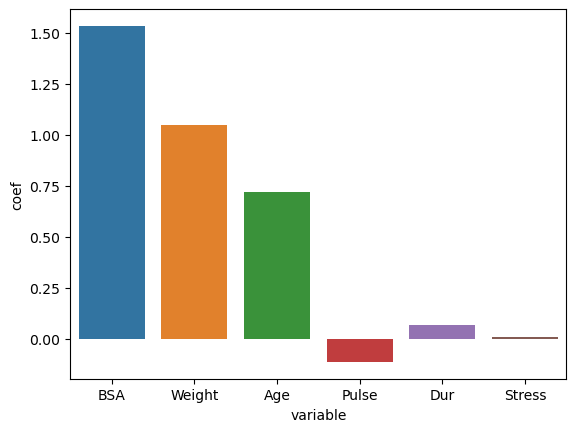

In [56]:
view_coeff(X, ridge_model)

# Ridge Regularisation

In [57]:
ridge_model = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    ridge_model.set_params(alpha = a)
    ridge_model.fit(X, y)
    coefs.append(ridge_model.coef_)
    errors.append(mean_squared_error(ridge_model.coef_, ridge_model.coef_))

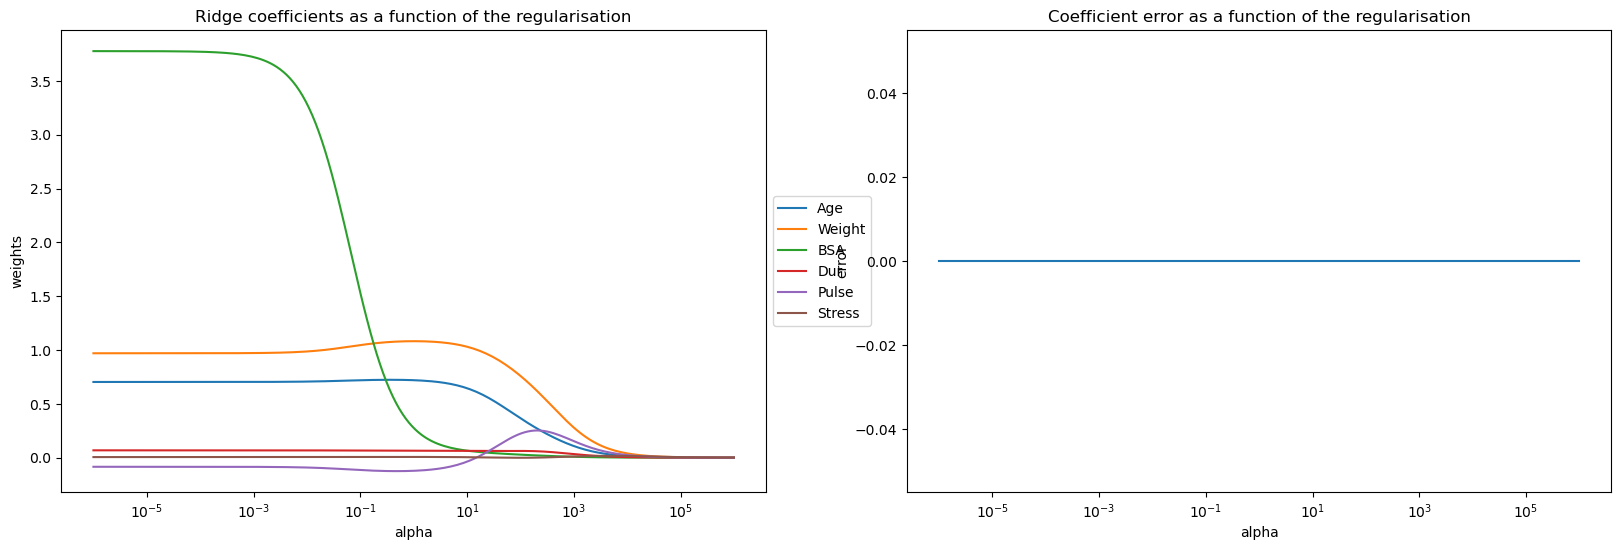

In [58]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')
plt.legend(X.columns, loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()


# Ridge Regression (Scaled)

In [60]:
# Fit the Ridge model using scaled features
X_scaled = scaler.fit_transform(X)

ridge_model = RidgeCV(alphas = np.logspace(-6, 6, 13))

ridge_model.fit(X_scaled, y)

# Predict using the scaled features
y_pred = ridge_model.predict(X_scaled)

ridge_model_alpha = ridge_model.alpha_

# Print the chosen alpha value
print("Ridge alpha:", ridge_model_alpha)

# Evaluate the model
r2_score = ridge_model.score(X_scaled, y)
print("R^2 score:", r2_score)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Ridge alpha: 0.1
R^2 score: 0.9960381139963241
Mean Squared Error: 0.11093280810292454


In [61]:
# Extract the coefficients
ridge_model_coef = pd.DataFrame({'feature': X.columns, 'coefficient': ridge_model.coef_})
ridge_model_coef

,feature,coefficient
0,Age,1.686471
1,Weight,3.901455
2,BSA,0.607068
3,Dur,0.143908
4,Pulse,-0.222459
5,Stress,0.168000


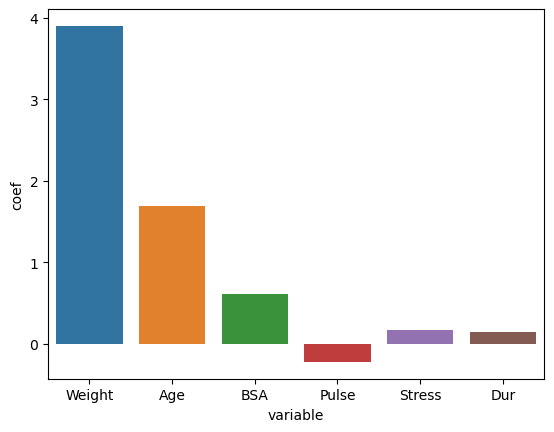

In [62]:
view_coeff(X, ridge_model)

In [63]:
ridge_model = Ridge(alpha = 1.0)

# Fit the Ridge model using scaled features
X_scaled = scaler.fit_transform(X)

ridge_model.fit(X_scaled, y)

# Predict using the scaled features
y_pred = ridge_model.predict(X_scaled)

# Evaluate the model
r2_score = ridge_model.score(X_scaled, y)
print("R^2 score:", r2_score)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

R^2 score: 0.9917235068614725
Mean Squared Error: 0.23174180787877036


In [64]:
# Extract the coefficients
ridge_model_coef = pd.DataFrame({'feature': X.columns, 'coefficient': ridge_model.coef_})
ridge_model_coef

,feature,coefficient
0,Age,1.526866
1,Weight,3.080537
2,BSA,1.117709
3,Dur,0.152486
4,Pulse,0.245081
5,Stress,0.006666


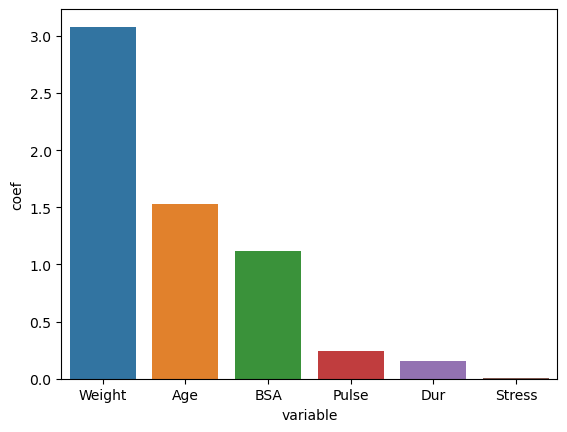

In [65]:
view_coeff(X, ridge_model)

In [66]:
X_scaled = scaler.fit_transform(X)

ridge_model = RidgeCV(alphas = np.logspace(-6, 6, 13))

ridge_model.fit(X_scaled, y)

# Predict using the scaled features
y_pred = ridge_model.predict(X_scaled)

cv_scores_r2 = cross_val_score(ridge_model, X_scaled, y, cv=10, scoring='r2')
cv_scores_mse = -cross_val_score(ridge_model, X_scaled, y, cv=10, scoring='neg_mean_squared_error')

for fold, (r2, mse) in enumerate(zip(cv_scores_r2, cv_scores_mse), 1):
    print(f"Fold {fold}: R2 Score = {r2:.4f}, MSE = {mse:.4f}")

avg_r2_score = np.mean(cv_scores_r2)
avg_mse = np.mean(cv_scores_mse)

print("\nAverage R2 Score:", avg_r2_score)
print("Average MSE:", avg_mse)

Fold 1: R2 Score = 0.9937, MSE = 0.1577
Fold 2: R2 Score = 0.1978, MSE = 0.2005
Fold 3: R2 Score = 0.9867, MSE = 0.2692
Fold 4: R2 Score = 0.9805, MSE = 0.5888
Fold 5: R2 Score = 0.9824, MSE = 0.0704
Fold 6: R2 Score = 0.5070, MSE = 0.1232
Fold 7: R2 Score = 0.9954, MSE = 0.0738
Fold 8: R2 Score = 0.9925, MSE = 0.2256
Fold 9: R2 Score = 0.9893, MSE = 0.1312
Fold 10: R2 Score = 0.9774, MSE = 0.8148

Average R2 Score: 0.8602793264174992
Average MSE: 0.26552644948353016


In [67]:
from ipywidgets import widgets

In [69]:
def ridge_coefs(X, y, alphas):

    coefs = []
    ridge_model = Ridge()
    
    for a in alphas:
        
        ridge_model.set_params(alpha=a)
        
        ridge_model.fit(X, y)
        coefs.append(ridge_model.coef_)
        
    return coefs

In [70]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(0, 5, 200)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(X, y, r_alphas)

In [71]:
# The cycler package lets us "cycle" throug colors.
from cycler import cycler

def coef_plotter(alphas, coefs, feature_names, to_alpha, regtype='ridge'):
    
    amin = np.min(alphas)
    amax = np.max(alphas)
    
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]
    
    colors = sns.color_palette("husl", len(coefs[0]))
    
    
    fig = plt.figure()
    fig.set_size_inches(18,5)
    ax1 = fig.add_subplot(121)
    ax1.set_prop_cycle(cycler('color', colors))
    
    ax1.axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    
    ax1.plot(alphas, coefs, lw=2)
    
    ax1.set_xlabel('alpha', fontsize=20)
    ax1.set_ylabel('coefficients', fontsize=20)
    
    if regtype == 'ridge':
        ax1.set_xscale('log')
    
    ax1.set_xlim([amin, amax])
    
    ax1.set_title(regtype+' coef paths\n', fontsize=20)
    
    ymin, ymax = ax1.get_ylim()

    ax2 = fig.add_subplot(122)
    
    ax2.bar(range(1, len(feature_names)+1), coefs[-1], align='center', color=colors)
    ax2.set_xticks(range(1, len(feature_names)+1))
    
    ax2.set_xticklabels(feature_names, rotation=65, fontsize=12)
    
    # enforce limits and add titles, labels
    ax2.set_ylim([ymin, ymax])
    ax2.set_title(regtype+' predictor coefs\n', fontsize=20)
    ax2.set_xlabel('coefficients', fontsize=20)
    ax2.set_ylabel('coefficients', fontsize=20)
    
    plt.show()


In [72]:
from ipywidgets import *
from IPython.display import display

In [73]:
def ridge_plot_runner(log_of_alpha=0):
    
    coef_plotter(r_alphas, r_coefs, X.columns, 10**log_of_alpha, regtype='ridge')

interact(ridge_plot_runner, log_of_alpha=(0.0,5.0,0.05))

interactive(children=(FloatSlider(value=0.0, description='log_of_alpha', max=5.0, step=0.05), Output()), _dom_…

<function __main__.ridge_plot_runner(log_of_alpha=0)>